In [1]:
#basic imports
import pandas as pd
import numpy as np

#visuals 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

In [2]:
#read in data
df = pd.read_csv('https://www.dropbox.com/s/qj3icie8zv18558/ESSdata_Thinkful.csv?dl=1') 
df.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
df.dropna(inplace=True)
df.drop(['idno'], axis=1, inplace=True)

In [5]:
df_y12 = df[df.year == 6]
df_y14 = df[df.year == 7]

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

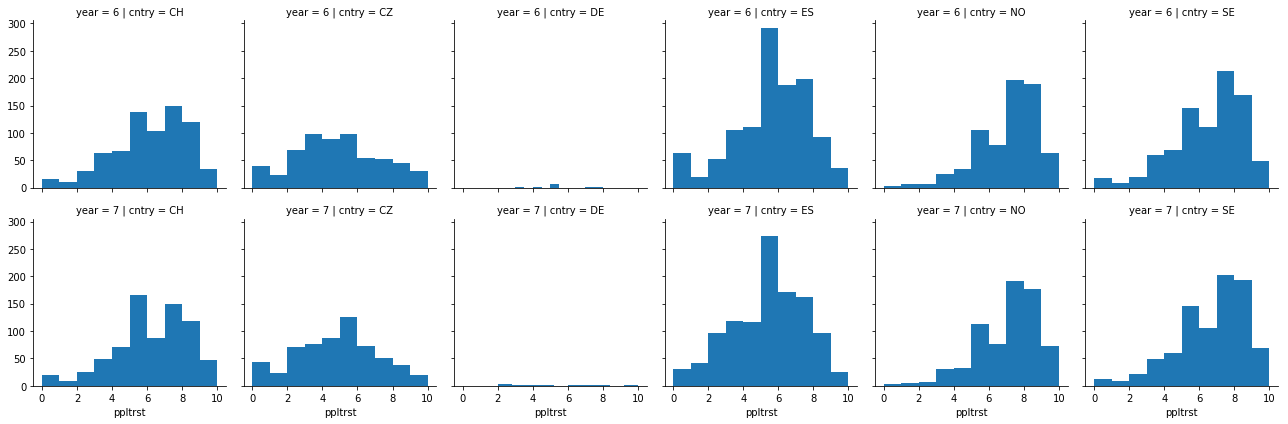

In [6]:
g = sns.FacetGrid(df, col="cntry",  row="year")
g = g.map(plt.hist, "ppltrst")

In [7]:
print('Shapiro Test for 2012\n')
for i in df_y12.cntry.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y12[df_y12.cntry == i]['ppltrst'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}'.format(p_value)) 
      
print('\nShapiro Test for 2014\n')
for i in df_y14.cntry.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y14[df_y14.cntry == i]['ppltrst'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}'.format(p_value))

Shapiro Test for 2012

CH Shapiro Results 
test statistic 0.9517108201980591 
p value 9.511383786695374e-15
CZ Shapiro Results 
test statistic 0.9680074453353882 
p value 3.6126571179018185e-10
DE Shapiro Results 
test statistic 0.8929166197776794 
p value 0.10693283379077911
ES Shapiro Results 
test statistic 0.949491024017334 
p value 1.6942651933374377e-19
NO Shapiro Results 
test statistic 0.9211018085479736 
p value 8.881221102071063e-19
SE Shapiro Results 
test statistic 0.9367397427558899 
p value 1.2586250953636158e-18

Shapiro Test for 2014

CH Shapiro Results 
test statistic 0.9547930955886841 
p value 2.4654701498145852e-14
CZ Shapiro Results 
test statistic 0.9715775847434998 
p value 1.8777941424019673e-09
DE Shapiro Results 
test statistic 0.9425466060638428 
p value 0.4519253373146057
ES Shapiro Results 
test statistic 0.9663601517677307 
p value 1.5275811452092943e-15
NO Shapiro Results 
test statistic 0.9292040467262268 
p value 7.928973676032161e-18
SE Shapiro Results

Considering our results from the Shapiro Wilkins test above, the null hypothesis that the data are normally distributed is rejected considering our p value is less than .05 for all countries and years other than DE. However, considering our observations size is very low here and this test is sensitive to sample size, it's likely detecting small and unimportant deviations from non-normality. Thus, we will conduct both parametric and non parametric tests.

In [8]:
print('T Test\n')
for i in df_y12.cntry.unique():    
    trst12 = df_y12[df_y12.cntry == i]['ppltrst']
    trst14 = df_y14[df_y14.cntry == i]['ppltrst'] 
    ttest=scipy.stats.ttest_ind(trst12,trst14)
    print('{} T Test Results\n'.format(i), '{}'.format(ttest)) 
    
print('\nKruskal Test\n')
for i in df_y12.cntry.unique():    
    trst12 = df_y12[df_y12.cntry == i]['ppltrst']
    trst14 = df_y14[df_y14.cntry == i]['ppltrst'] 
    ktest=scipy.stats.kruskal(trst12,trst14)
    print('{} Kruskal Test Results\n'.format(i), '{}'.format(ktest))

T Test

CH T Test Results
 Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ T Test Results
 Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE T Test Results
 Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES T Test Results
 Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO T Test Results
 Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131977)
SE T Test Results
 Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)

Kruskal Test

CH Kruskal Test Results
 KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)
CZ Kruskal Test Results
 KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)
DE Kruskal Test Results
 KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
ES Kruskal Test Results
 KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)
NO Kruskal Test Results
 Kruska

Results from both the t test and kruskal test showcase significant changes in trust between the years of 2012 and 2014 for ES and SE.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

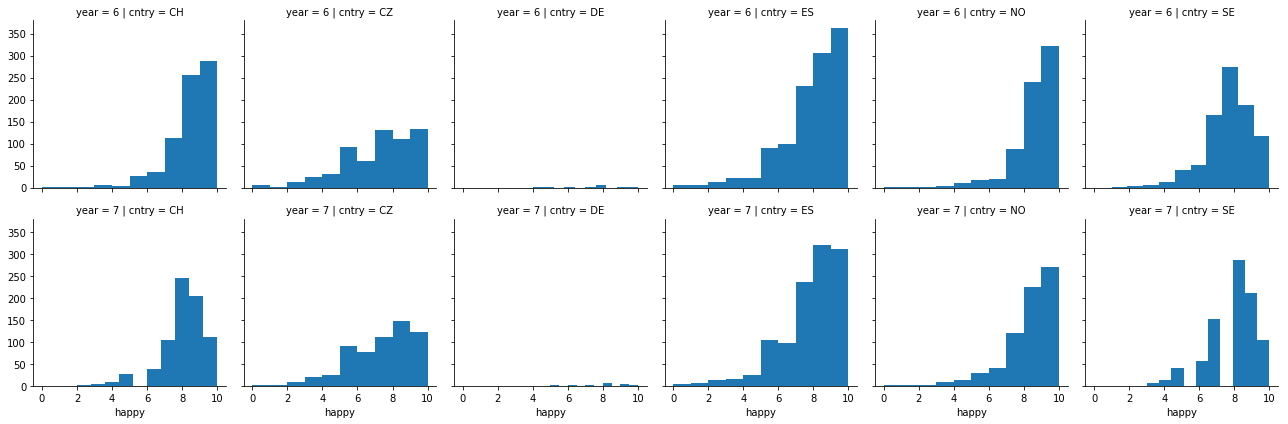

In [9]:
g = sns.FacetGrid(df, col="cntry",  row="year")
g = g.map(plt.hist, "happy")

In [10]:
print('Shapiro Test for 2012\n')
for i in df_y12.cntry.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y12[df_y12.cntry == i]['happy'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}'.format(p_value)) 
      
print('\nShapiro Test for 2014\n')
for i in df_y14.cntry.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y14[df_y14.cntry == i]['happy'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}'.format(p_value))

Shapiro Test for 2012

CH Shapiro Results 
test statistic 0.8773602843284607 
p value 1.4611401593361174e-23
CZ Shapiro Results 
test statistic 0.9462587833404541 
p value 5.939277796787254e-14
DE Shapiro Results 
test statistic 0.9160983562469482 
p value 0.22210942208766937
ES Shapiro Results 
test statistic 0.9052610397338867 
p value 3.4151276945678624e-26
NO Shapiro Results 
test statistic 0.8498518466949463 
p value 2.291937245544563e-25
SE Shapiro Results 
test statistic 0.9025380611419678 
p value 5.918160728712866e-23

Shapiro Test for 2014

CH Shapiro Results 
test statistic 0.8950787782669067 
p value 4.273768685964887e-22
CZ Shapiro Results 
test statistic 0.9448645710945129 
p value 3.1643033327052525e-14
DE Shapiro Results 
test statistic 0.9213663339614868 
p value 0.23006466031074524
ES Shapiro Results 
test statistic 0.9136462211608887 
p value 6.898763644671094e-25
NO Shapiro Results 
test statistic 0.8795287609100342 
p value 4.6808705797415216e-23
SE Shapiro Results

Once again, our results from the Shapiro Wilkins test showcases that our null hypothesis of the data are normally distributed can be rejected considering our p value is less than .05 for all countries and years other than DE.

Again, we will conduct both parametric and non parametric tests.

In [11]:
print('T Test\n')
for i in df_y12.cntry.unique():    
    trst12 = df_y12[df_y12.cntry == i]['happy']
    trst14 = df_y14[df_y14.cntry == i]['happy'] 
    ttest=scipy.stats.ttest_ind(trst12,trst14)
    print('{} T Test Results\n'.format(i), '{}'.format(ttest)) 
    
print('\nKruskal Test\n')
for i in df_y12.cntry.unique():    
    trst12 = df_y12[df_y12.cntry == i]['happy']
    trst14 = df_y14[df_y14.cntry == i]['happy'] 
    ktest=scipy.stats.kruskal(trst12,trst14)
    print('{} Kruskal Test Results\n'.format(i), '{}'.format(ktest))

T Test

CH T Test Results
 Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
CZ T Test Results
 Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
DE T Test Results
 Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES T Test Results
 Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO T Test Results
 Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE T Test Results
 Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)

Kruskal Test

CH Kruskal Test Results
 KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
CZ Kruskal Test Results
 KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
DE Kruskal Test Results
 KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
ES Kruskal Test Results
 KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
NO Kruskal Test Results
 KruskalRes

Our t test indicates that there are not significant changes within happiness for any country between 2012 and 2014. However, because the visuals and Shapiro test indicate non normality, we'll use the Kruskal test as a reference and from this we can see a significant difference in happiness over the years for ES and NO.

## Who reported watching more TV in 2012, men or women?

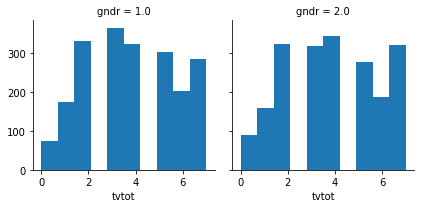

In [12]:
g = sns.FacetGrid(df_y12, col="gndr")
g = g.map(plt.hist, "tvtot")

In [13]:
print('Shapiro Test for 2012 Gender TV Time\n')
for i in df_y12.gndr.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y12[df_y12.gndr == i]['tvtot'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}\n'.format(p_value))

Shapiro Test for 2012 Gender TV Time

2.0 Shapiro Results 
test statistic 0.9407297372817993 
p value 1.0867231118970029e-27

1.0 Shapiro Results 
test statistic 0.9443334937095642 
p value 3.718612884828085e-27



Considering the distribution is non normal for both gender types in 2012, we will again use the kruskal test to determine whether or not there is a signficant different between the two genders.

In [14]:
print('Kruskal Test for 2012 Gender TV Time\n')
tvtot1 = df_y12[df_y12.gndr == 1]['tvtot']
tvtot2 = df_y12[df_y12.gndr == 2]['tvtot']
ktest=scipy.stats.kruskal(tvtot1,tvtot2)
print('{}'.format(ktest))

Kruskal Test for 2012 Gender TV Time

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)


Seeing as our pvalue is greater than .05 we will fail to reject the null hypothesis that there is a significant change between the groups in tv times.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

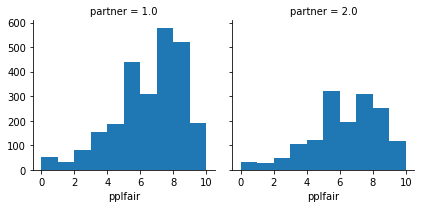

In [15]:
g = sns.FacetGrid(df_y12, col="partner")
g = g.map(plt.hist, "pplfair")

In [16]:
print('Shapiro Test for 2012 for people with and without a partner\'s belief in people\'s fairness\n')
for i in df_y12.partner.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y12[df_y12.partner == i]['pplfair'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}\n'.format(p_value))

Shapiro Test for 2012 for people with and without a partner's belief in people's fairness

1.0 Shapiro Results 
test statistic 0.9396088123321533 
p value 5.344745707680362e-31

2.0 Shapiro Results 
test statistic 0.9547916650772095 
p value 2.436869843664993e-21



In [17]:
print('Kruskaal Test for 2012 for people with and without a partner\'s belief in people\'s fairness\n')
fair1 = df_y12[df_y12.partner == 1]['pplfair']
fair2 = df_y12[df_y12.partner == 2]['pplfair']
ktest=scipy.stats.kruskal(fair1,fair2)
print('{}'.format(ktest))

Kruskaal Test for 2012 for people with and without a partner's belief in people's fairness

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)


In [18]:
print(fair1.describe())
print(fair2.describe())

count    2542.000000
mean        6.074351
std         2.102916
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64
count    1529.000000
mean        5.865925
std         2.138453
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64


## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

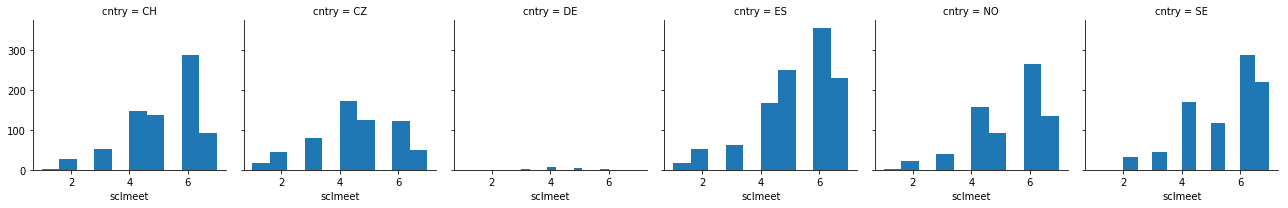

In [19]:
g = sns.FacetGrid(df_y14, col="cntry")
g = g.map(plt.hist, "sclmeet")

In [20]:
print('Shapiro Test for 2014 for people\'s social meetings by country\n')
for i in df_y14.cntry.unique(): 
       shapiro_results = scipy.stats.shapiro(df_y14[df_y14.cntry == i]['sclmeet'])
       t_statistic = shapiro_results[0]
       p_value = shapiro_results[1]
       print('{} Shapiro Results'.format(i), '\ntest statistic {}'.format(t_statistic),'\np value {}\n'.format(p_value))

Shapiro Test for 2014 for people's social meetings by country

CH Shapiro Results 
test statistic 0.8976361155509949 
p value 7.658747353767709e-22

CZ Shapiro Results 
test statistic 0.9442528486251831 
p value 2.5791458676876697e-14

DE Shapiro Results 
test statistic 0.8616600036621094 
p value 0.032099850475788116

ES Shapiro Results 
test statistic 0.8927679657936096 
p value 2.280180298346974e-27

NO Shapiro Results 
test statistic 0.887718915939331 
p value 2.537563078833279e-22

SE Shapiro Results 
test statistic 0.8782685399055481 
p value 1.7535298169699071e-25



Looks like these distributions are non normal, thus we will use Kruskal test for determining significant differences between groups.

In [21]:
print('Anova Test for 2014 for people\'s social meetings by country\n')
meet1 = df_y14[df_y14.cntry == 'CH']['sclmeet']
meet2 = df_y14[df_y14.cntry == 'CZ']['sclmeet']
meet3 = df_y14[df_y14.cntry == 'ES']['sclmeet']
anova_test=scipy.stats.f_oneway(meet1,meet2,meet3)
print('{}'.format(anova_test))

Anova Test for 2014 for people's social meetings by country

F_onewayResult(statistic=63.151657307073876, pvalue=1.774754769196842e-27)


In [22]:
print('Kruskal Test for 2014 for people\'s social meetings by country\n')
ktest=scipy.stats.kruskal(meet1,meet2,meet3)
print('{}'.format(ktest))

Kruskal Test for 2014 for people's social meetings by country

KruskalResult(statistic=126.52408817790707, pvalue=3.354620049166388e-28)


In [23]:
df_meet = np.asarray(meet1.tolist()+meet2.tolist()+meet3.tolist())
meet_co = np.array(['CH']*len(meet1) + ['CZ']*len(meet2) +['ES']*len(meet3))

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_meet,      # Data
                          groups=meet_co,   # Groups
                          alpha=0.05)  
print(tukey)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  CH     CZ   -0.6799  -0.8605 -0.4993  True 
  CH     ES    0.0887   -0.067  0.2444 False 
  CZ     ES    0.7686   0.6026  0.9346  True 
---------------------------------------------


According to the tukey test, Czech Republic is significantly different from Spain and Sweden.

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?